In [4]:
!pip install pandas
!pip install plotly
!pip install geocoder

In [8]:
import requests
import json
import pandas as pd
import plotly.express as px

url = "https://ap-south-1.aws.data.mongodb-api.com/app/triggers-lvqxp/endpoint/TrashTrack"

response = requests.request("GET", url=url)

a = json.loads(response.text)
df = pd.DataFrame.from_records(a)

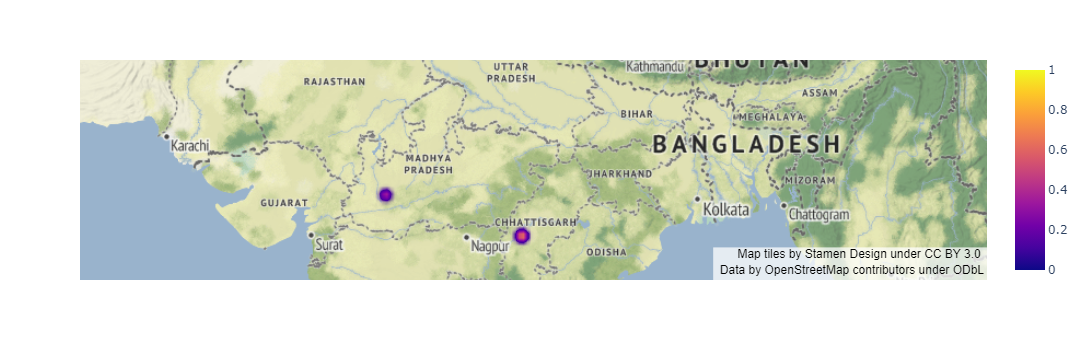

In [9]:
fig = px.density_mapbox(df, lat = 'lat', lon = 'long', 
                        radius = 10,
                        center = dict(lat =28.718411, lon = 77.063736),
                        zoom = 10,
                        mapbox_style = 'stamen-terrain')
fig.show() 


In [7]:
import requests
import json
import geocoder
import datetime

g = geocoder.ip('me')
lat, lon = g.latlng


url = "https://ap-south-1.aws.data.mongodb-api.com/app/data-eauco/endpoint/data/v1/action/insertOne"

payload = json.dumps({
    "collection": "Trashtrack",
    "database": "Trashtrack",
    "dataSource": "Cluster0",
    "document": {
"lat":lat,
"long":lon,
"time":datetime.datetime.now().strftime("%I:%M%p on %B %d, %Y")
    }
})
headers = {
  'Content-Type': 'application/ejson',
  'Access-Control-Request-Headers': '*',
  'api-key': ,
}

response = requests.request("POST", url, headers=headers, data=payload)

print(response.text)


{"insertedId":"65185061657079e95404844e"}
